In [ ]:
import time

#Количество секунд с начала эпохи и текущее время
seconds = time.time()
local_time = time.ctime(seconds)

print(f'Кол-во секунд с начала эпохи {seconds}') #Кол-во секунд с начала эпохи 1742102921.0929968
print('Местное время:', local_time)

Кол-во секунд с начала эпохи 1742102982.143844
Местное время: Sun Mar 16 10:29:42 2025


In [ ]:
#Задержка кода
print('Первый код')
time.sleep(10)
print('Следующий код через 10 секунд')

Первый код
Следующий код через 10 секунд


In [ ]:
#Способы измерить время выполнения программы
st_time1 = time.monotonic()
st_time2 = time.perf_counter()

time.sleep(5)

f_time1 = time.monotonic()
f_time2 = time.perf_counter()

print(f'Точное время {f_time1 - st_time1}')   #Точное время 5.0
print(f'Очень точное время {f_time2 - st_time2}') #Очень точное время 5.000933499999519

Точное время 5.0
Очень точное время 5.000933499999519


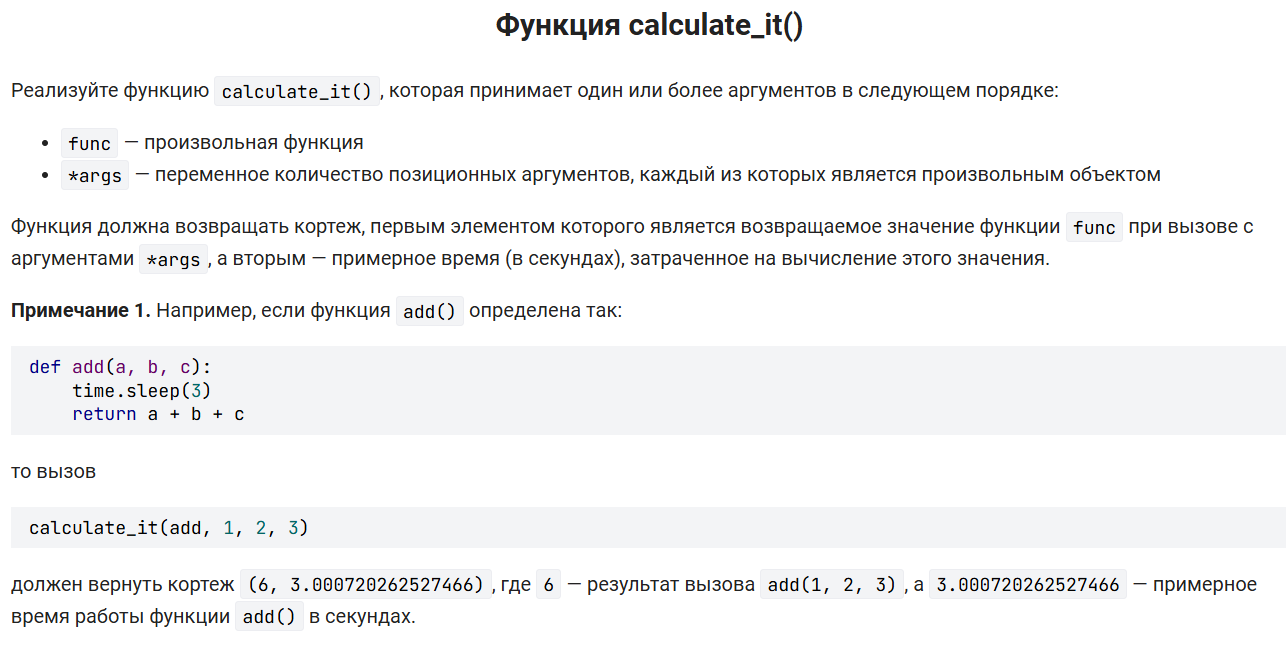

In [9]:
def add(a, b, c):
    time.sleep(3)
    return a + b + c

def calculate_it(add,*args):
    st = time.monotonic()
    res = add(*args)
    fn = time.monotonic()
    return (res,fn-st)

calculate_it(add,1,2,3)


(6, 3.0)

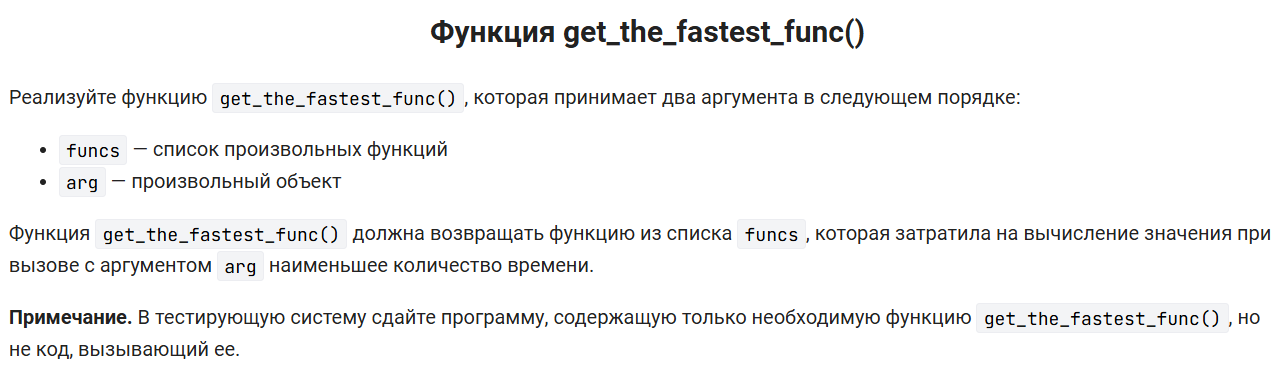

In [19]:
def multiply_two(a):
    return a * 2
def multiply_four(a):
    return a * 4

def get_the_fastest_func(*funcs,arg):
    dick = {}
    for f in funcs:
        st = time.perf_counter()
        res = f(arg)
        fn = time.perf_counter()
        dick[fn-st] = f
    return dick[min(dick)]

res = get_the_fastest_func(multiply_two,multiply_four,arg=3)
res


<function __main__.multiply_four(a)>

In [22]:
from math import factorial                   # функция из модуля math     


def factorial_recurrent(n):                  # рекурсивная функция
    if n == 0:
        return 1
    return n * factorial_recurrent(n - 1)    


def factorial_classic(n):                    # итеративная функция
    f = 1
    for i in range(2, n + 1):
        f *= i
    return f

def get_the_fastest_func(funcs, arg):
    return min(funcs, key=lambda f: measure_time(f, arg))

# 🔹 Вспомогательная функция для измерения времени
def measure_time(func, arg):
    start = time.perf_counter()
    func(arg)
    end = time.perf_counter()
    return end - start  # Разница во времени работы функции

def get_the_fastest_func_no_arg(funcs):
    return min(funcs, key=lambda f: measure_time_no_arg(f))

# 🔹 Вспомогательная функция для измерения времени
def measure_time_no_arg(func):
    start = time.perf_counter()
    func()
    end = time.perf_counter()
    return end - start  # Разница во времени работы функции

res = get_the_fastest_func([factorial,factorial_recurrent,factorial_classic],arg=900)
res

<function math.factorial(n, /)>

In [23]:
def for_and_append():                            # с использованием цикла for и метода append()
    iterations = 10_000_000
    result = []
    for i in range(iterations):
        result.append(i + 1)
    return result
        

def list_comprehension():                        # с использованием списочного выражения
    iterations = 10_000_000
    return [i + 1 for i in range(iterations)] 

res = get_the_fastest_func_no_arg([for_and_append,list_comprehension])
res

<function __main__.list_comprehension()>